In [9]:
from osgeo import gdal
ds = gdal.Open('../data/USCOSB20170216_SUPERsnow_depth_50p0m_agg.tif')
width = ds.RasterXSize
height = ds.RasterYSize

width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3] 

gt

        
        
from osgeo import osr, gdal

# get the existing coordinate system
ds = gdal.Open('../data/USCOSB20170216_SUPERsnow_depth_50p0m_agg.tif')
old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs .ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs) 

#get the point to transform, pixel (0,0) in this case
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 

#get the coordinates in lat long
latlong = transform.TransformPoint(minx,miny)

print(gt)




(258147.0, 50.0, 0.0, 4202598.0, 0.0, -50.0)


In [19]:
gt[1]


50.0

In [7]:
for x in xrange(width):
    x_local_coordinate = minx + (gt[1]*x)
    for y in xrange(height):
        y_local_coordinate = miny + (gt[5]*y)
        new_point = transform.TransformPoint(x_local_coordinate, y_local_coordinate)
        print(new_point)

(-107.74904296834882, 37.855979714265544, 0.0)
(-107.7490262392941, 37.8555295781586, 0.0)
(-107.7490095106119, 37.85507944201087, 0.0)
(-107.74899278230225, 37.85462930582235, 0.0)
(-107.74897605436512, 37.854179169593024, 0.0)
(-107.74895932680052, 37.85372903332291, 0.0)
(-107.74894259960841, 37.853278897012, 0.0)
(-107.7489258727888, 37.8528287606603, 0.0)
(-107.74890914634169, 37.85237862426781, 0.0)
(-107.74889242026705, 37.85192848783453, 0.0)
(-107.7488756945649, 37.851478351360456, 0.0)
(-107.74885896923519, 37.85102821484559, 0.0)
(-107.74884224427795, 37.85057807828993, 0.0)
(-107.74882551969314, 37.850127941693486, 0.0)
(-107.7488087954808, 37.84967780505625, 0.0)
(-107.74879207164086, 37.849227668378234, 0.0)
(-107.74877534817334, 37.84877753165941, 0.0)
(-107.74875862507825, 37.84832739489981, 0.0)
(-107.74874190235553, 37.847877258099416, 0.0)
(-107.74872518000522, 37.84742712125824, 0.0)
(-107.74870845802731, 37.84697698437627, 0.0)
(-107.74869173642176, 37.846526847453

(-107.74455132295107, 37.82680023499833, 0.0)
(-107.74453463872909, 37.82635009495997, 0.0)
(-107.74451795487863, 37.82589995488084, 0.0)
(-107.74450127139966, 37.82544981476095, 0.0)
(-107.7444845882922, 37.82499967460031, 0.0)
(-107.7444679055562, 37.82454953439892, 0.0)
(-107.74445122319169, 37.824099394156754, 0.0)
(-107.74443454119866, 37.82364925387385, 0.0)
(-107.74441785957706, 37.823199113550174, 0.0)
(-107.74440117832692, 37.822748973185746, 0.0)
(-107.74438449744824, 37.82229883278058, 0.0)
(-107.74436781694097, 37.82184869233463, 0.0)
(-107.74435113680512, 37.82139855184794, 0.0)
(-107.74433445704071, 37.820948411320494, 0.0)
(-107.74431777764767, 37.8204982707523, 0.0)
(-107.74430109862605, 37.82004813014335, 0.0)
(-107.74428441997583, 37.81959798949364, 0.0)
(-107.74426774169696, 37.819147848803176, 0.0)
(-107.74425106378948, 37.81869770807196, 0.0)
(-107.74423438625335, 37.818247567299984, 0.0)
(-107.74421770908859, 37.81779742648727, 0.0)
(-107.74420103229515, 37.817347

(-107.73909746819231, 37.78683004967278, 0.0)
(-107.7390808410284, 37.78637990451784, 0.0)
(-107.73906421423466, 37.785929759322194, 0.0)
(-107.73904758781113, 37.78547961408583, 0.0)
(-107.73903096175776, 37.78502946880875, 0.0)
(-107.73901433607458, 37.784579323490966, 0.0)
(-107.73899771076154, 37.784129178132474, 0.0)
(-107.73898108581865, 37.78367903273327, 0.0)
(-107.73896446124591, 37.78322888729335, 0.0)
(-107.73894783704333, 37.78277874181272, 0.0)
(-107.73893121321085, 37.782328596291386, 0.0)
(-107.73891458974848, 37.78187845072933, 0.0)
(-107.73889796665622, 37.78142830512658, 0.0)
(-107.73888134393407, 37.780978159483105, 0.0)
(-107.73886472158202, 37.780528013798936, 0.0)
(-107.73884809960003, 37.78007786807405, 0.0)
(-107.73883147798813, 37.779627722308454, 0.0)
(-107.73881485674629, 37.77917757650216, 0.0)
(-107.7387982358745, 37.778727430655145, 0.0)
(-107.73878161537276, 37.77827728476744, 0.0)
(-107.73876499524106, 37.777827138839015, 0.0)
(-107.73874837547939, 37.77

(-107.73610727682247, 37.81348093363426, 0.0)
(-107.73609065186139, 37.813030789392705, 0.0)
(-107.7360740272705, 37.81258064511044, 0.0)
(-107.73605740304978, 37.812130500787454, 0.0)
(-107.73604077919923, 37.81168035642377, 0.0)
(-107.73602415571882, 37.81123021201937, 0.0)
(-107.73600753260857, 37.81078006757424, 0.0)
(-107.73599090986843, 37.810329923088425, 0.0)
(-107.73597428749844, 37.809879778561886, 0.0)
(-107.73595766549855, 37.80942963399463, 0.0)
(-107.73594104386878, 37.80897948938667, 0.0)
(-107.7359244226091, 37.808529344738005, 0.0)
(-107.73590780171952, 37.80807920004862, 0.0)
(-107.73589118120002, 37.807629055318515, 0.0)
(-107.73587456105058, 37.80717891054773, 0.0)
(-107.73585794127122, 37.80672876573622, 0.0)
(-107.73584132186191, 37.80627862088399, 0.0)
(-107.73582470282265, 37.805828475991056, 0.0)
(-107.73580808415343, 37.805378331057426, 0.0)
(-107.73579146585425, 37.804928186083075, 0.0)
(-107.73577484792507, 37.80447804106803, 0.0)
(-107.73575823036592, 37.80

(-107.73099081365747, 37.7825130410655, 0.0)
(-107.73097423824167, 37.78206289252962, 0.0)
(-107.73095766319494, 37.78161274395308, 0.0)
(-107.73094108851721, 37.781162595335864, 0.0)
(-107.73092451420852, 37.78071244667797, 0.0)
(-107.73090794026886, 37.78026229797942, 0.0)
(-107.73089136669819, 37.77981214924018, 0.0)
(-107.73087479349653, 37.77936200046027, 0.0)
(-107.73085822066385, 37.778911851639684, 0.0)
(-107.73084164820015, 37.77846170277843, 0.0)
(-107.73082507610542, 37.7780115538765, 0.0)
(-107.73080850437965, 37.777561404933905, 0.0)
(-107.73079193302283, 37.77711125595065, 0.0)
(-107.73077536203496, 37.7766611069267, 0.0)
(-107.73075879141604, 37.776210957862105, 0.0)
(-107.73074222116603, 37.77576080875682, 0.0)
(-107.73072565128494, 37.77531065961087, 0.0)
(-107.73070908177277, 37.774860510424254, 0.0)
(-107.7306925126295, 37.77441036119697, 0.0)
(-107.73067594385512, 37.77396021192901, 0.0)
(-107.73314644347589, 37.856350039393476, 0.0)
(-107.73312981086352, 37.8558998

(-107.7277950191024, 37.819080231870416, 0.0)
(-107.72777844127067, 37.81863008493306, 0.0)
(-107.72776186380807, 37.81817993795504, 0.0)
(-107.72774528671458, 37.81772979093632, 0.0)
(-107.72772870999025, 37.817279643876944, 0.0)
(-107.727712133635, 37.81682949677687, 0.0)
(-107.72769555764887, 37.81637934963613, 0.0)
(-107.72767898203182, 37.8159292024547, 0.0)
(-107.72766240678386, 37.8154790552326, 0.0)
(-107.727645831905, 37.81502890796983, 0.0)
(-107.72762925739518, 37.81457876066638, 0.0)
(-107.72761268325442, 37.81412861332226, 0.0)
(-107.72759610948273, 37.81367846593745, 0.0)
(-107.72757953608006, 37.81322831851196, 0.0)
(-107.72756296304645, 37.81277817104583, 0.0)
(-107.72754639038185, 37.81232802353898, 0.0)
(-107.72752981808627, 37.81187787599149, 0.0)
(-107.72751324615969, 37.81142772840332, 0.0)
(-107.72749667460211, 37.81097758077446, 0.0)
(-107.72748010341353, 37.810527433104944, 0.0)
(-107.7274635325939, 37.81007728539474, 0.0)
(-107.72744696214329, 37.80962713764388

(-107.72494934498032, 37.849782218400435, 0.0)
(-107.72493276613072, 37.8493320727461, 0.0)
(-107.72491618765031, 37.84888192705108, 0.0)
(-107.72489960953908, 37.8484317813154, 0.0)
(-107.72488303179705, 37.84798163553901, 0.0)
(-107.72486645442417, 37.84753148972195, 0.0)
(-107.72484987742047, 37.847081343864204, 0.0)
(-107.72483330078592, 37.84663119796578, 0.0)
(-107.72481672452051, 37.84618105202669, 0.0)
(-107.72480014862424, 37.8457309060469, 0.0)
(-107.7247835730971, 37.84528076002644, 0.0)
(-107.7247669979391, 37.8448306139653, 0.0)
(-107.72475042315018, 37.84438046786347, 0.0)
(-107.72473384873037, 37.843930321720975, 0.0)
(-107.72471727467966, 37.8434801755378, 0.0)
(-107.72470070099803, 37.84303002931395, 0.0)
(-107.72468412768546, 37.84257988304941, 0.0)
(-107.72466755474198, 37.84212973674421, 0.0)
(-107.72465098216755, 37.84167959039833, 0.0)
(-107.72463440996216, 37.84122944401175, 0.0)
(-107.72461783812582, 37.84077929758453, 0.0)
(-107.72460126665851, 37.8403291511165

(-107.72028581582904, 37.81564976416855, 0.0)
(-107.72026928563969, 37.81519961415424, 0.0)
(-107.72025275581841, 37.814749464099286, 0.0)
(-107.72023622636517, 37.814299314003684, 0.0)
(-107.72021969728002, 37.81384916386743, 0.0)
(-107.7202031685629, 37.81339901369055, 0.0)
(-107.72018664021383, 37.812948863473025, 0.0)
(-107.7201701122328, 37.81249871321486, 0.0)
(-107.72015358461978, 37.81204856291604, 0.0)
(-107.72013705737479, 37.81159841257659, 0.0)
(-107.72012053049778, 37.811148262196504, 0.0)
(-107.72010400398878, 37.81069811177577, 0.0)
(-107.72008747784778, 37.81024796131439, 0.0)
(-107.72007095207475, 37.80979781081238, 0.0)
(-107.72005442666969, 37.80934766026971, 0.0)
(-107.7200379016326, 37.808897509686425, 0.0)
(-107.72002137696346, 37.80844735906249, 0.0)
(-107.72000485266226, 37.807997208397914, 0.0)
(-107.719988328729, 37.80754705769271, 0.0)
(-107.71997180516365, 37.80709690694685, 0.0)
(-107.71995528196625, 37.80664675616036, 0.0)
(-107.71993875913674, 37.80619660

(-107.71711734920764, 37.85311703631866, 0.0)
(-107.71710081599029, 37.852666887987574, 0.0)
(-107.71708428314115, 37.85221673961586, 0.0)
(-107.71706775066018, 37.85176659120349, 0.0)
(-107.71705121854738, 37.851316442750466, 0.0)
(-107.71703468680275, 37.85086629425681, 0.0)
(-107.71701815542626, 37.85041614572249, 0.0)
(-107.71700162441793, 37.849965997147535, 0.0)
(-107.71698509377772, 37.84951584853192, 0.0)
(-107.71696856350566, 37.849065699875666, 0.0)
(-107.7169520336017, 37.84861555117877, 0.0)
(-107.71693550406584, 37.84816540244122, 0.0)
(-107.71691897489809, 37.84771525366303, 0.0)
(-107.71690244609846, 37.8472651048442, 0.0)
(-107.71688591766687, 37.8468149559847, 0.0)
(-107.71686938960339, 37.84636480708458, 0.0)
(-107.71685286190795, 37.845914658143805, 0.0)
(-107.71683633458058, 37.84546450916239, 0.0)
(-107.71681980762125, 37.845014360140325, 0.0)
(-107.71680328102997, 37.844564211077625, 0.0)
(-107.71678675480672, 37.84411406197427, 0.0)
(-107.71677022895149, 37.84366

(-107.7113863721201, 37.78972414934569, 0.0)
(-107.7113699113316, 37.78927399402172, 0.0)
(-107.71135345090958, 37.788823838657144, 0.0)
(-107.71133699085408, 37.78837368325201, 0.0)
(-107.71132053116504, 37.787923527806264, 0.0)
(-107.71130407184249, 37.78747337231992, 0.0)
(-107.71128761288642, 37.78702321679301, 0.0)
(-107.7112711542968, 37.78657306122548, 0.0)
(-107.71125469607362, 37.7861229056174, 0.0)
(-107.7112382382169, 37.785672749968704, 0.0)
(-107.7112217807266, 37.78522259427943, 0.0)
(-107.71120532360274, 37.78477243854957, 0.0)
(-107.71118886684528, 37.78432228277912, 0.0)
(-107.71117241045424, 37.78387212696808, 0.0)
(-107.7111559544296, 37.783421971116454, 0.0)
(-107.71113949877133, 37.78297181522424, 0.0)
(-107.71112304347946, 37.78252165929145, 0.0)
(-107.71110658855396, 37.78207150331807, 0.0)
(-107.71109013399483, 37.7816213473041, 0.0)
(-107.71107367980206, 37.78117119124955, 0.0)
(-107.71105722597562, 37.78072103515442, 0.0)
(-107.71104077251552, 37.7802708790186

(-107.70826308899359, 37.828541919158425, 0.0)
(-107.70824662417338, 37.828091765641155, 0.0)
(-107.70823015971982, 37.827641612083305, 0.0)
(-107.70821369563286, 37.82719145848485, 0.0)
(-107.70819723191256, 37.82674130484578, 0.0)
(-107.70818076855886, 37.826291151166146, 0.0)
(-107.70816430557177, 37.825840997445894, 0.0)
(-107.70814784295126, 37.82539084368506, 0.0)
(-107.70813138069734, 37.824940689883626, 0.0)
(-107.70811491881001, 37.82449053604159, 0.0)
(-107.70809845728924, 37.82404038215898, 0.0)
(-107.70808199613504, 37.82359022823575, 0.0)
(-107.70806553534737, 37.82314007427194, 0.0)
(-107.70804907492627, 37.822689920267536, 0.0)
(-107.70803261487168, 37.822239766222545, 0.0)
(-107.70801615518364, 37.821789612136946, 0.0)
(-107.7079996958621, 37.82133945801076, 0.0)
(-107.70798323690708, 37.82088930384399, 0.0)
(-107.70796677831855, 37.82043914963663, 0.0)
(-107.70795032009653, 37.81998899538867, 0.0)
(-107.70793386224098, 37.81953884110012, 0.0)
(-107.7079174047519, 37.81

(-107.70261525100086, 37.78271725123961, 0.0)
(-107.70259884755914, 37.78226709211261, 0.0)
(-107.70258244448266, 37.78181693294508, 0.0)
(-107.70256604177139, 37.78136677373698, 0.0)
(-107.70254963942531, 37.78091661448835, 0.0)
(-107.70253323744443, 37.78046645519916, 0.0)
(-107.70251683582873, 37.78001629586942, 0.0)
(-107.70250043457823, 37.77956613649914, 0.0)
(-107.70248403369287, 37.77911597708831, 0.0)
(-107.70246763317269, 37.77866581763694, 0.0)
(-107.70245123301765, 37.77821565814503, 0.0)
(-107.70243483322777, 37.77776549861256, 0.0)
(-107.70241843380302, 37.77731533903956, 0.0)
(-107.70240203474339, 37.776865179426004, 0.0)
(-107.70238563604887, 37.77641501977192, 0.0)
(-107.70236923771947, 37.77596486007727, 0.0)
(-107.70235283975516, 37.77551470034209, 0.0)
(-107.70233644215597, 37.77506454056636, 0.0)
(-107.70232004492183, 37.7746143807501, 0.0)
(-107.70475907071335, 37.85700600397705, 0.0)
(-107.70474261033654, 37.856555851334335, 0.0)
(-107.7047261503263, 37.856105698

(-107.69931678983458, 37.80126486705308, 0.0)
(-107.6993003954597, 37.80081470811977, 0.0)
(-107.69928400144984, 37.800364549145925, 0.0)
(-107.69926760780503, 37.79991439013153, 0.0)
(-107.69925121452523, 37.7994642310766, 0.0)
(-107.69923482161045, 37.79901407198113, 0.0)
(-107.69921842906068, 37.798563912845125, 0.0)
(-107.6992020368759, 37.79811375366855, 0.0)
(-107.69918564505612, 37.79766359445146, 0.0)
(-107.69916925360131, 37.797213435193825, 0.0)
(-107.69915286251148, 37.79676327589564, 0.0)
(-107.69913647178662, 37.79631311655694, 0.0)
(-107.69912008142671, 37.795862957177675, 0.0)
(-107.69910369143173, 37.79541279775787, 0.0)
(-107.69908730180171, 37.79496263829754, 0.0)
(-107.69907091253661, 37.79451247879666, 0.0)
(-107.69905452363643, 37.794062319255254, 0.0)
(-107.69903813510116, 37.7936121596733, 0.0)
(-107.69902174693081, 37.79316200005081, 0.0)
(-107.69900535912532, 37.792711840387796, 0.0)
(-107.69898897168476, 37.79226168068422, 0.0)
(-107.69897258460904, 37.7918115

(-107.6960722568113, 37.83693140802873, 0.0)
(-107.6960558611034, 37.83648125062143, 0.0)
(-107.69603946576062, 37.83603109317358, 0.0)
(-107.69602307078293, 37.83558093568521, 0.0)
(-107.69600667617036, 37.83513077815627, 0.0)
(-107.69599028192286, 37.83468062058679, 0.0)
(-107.69597388804044, 37.83423046297676, 0.0)
(-107.69595749452309, 37.83378030532619, 0.0)
(-107.6959411013708, 37.83333014763507, 0.0)
(-107.69592470858358, 37.83287998990342, 0.0)
(-107.69590831616138, 37.832429832131204, 0.0)
(-107.69589192410423, 37.83197967431846, 0.0)
(-107.6958755324121, 37.83152951646516, 0.0)
(-107.69585914108498, 37.83107935857133, 0.0)
(-107.69584275012289, 37.83062920063694, 0.0)
(-107.6958263595258, 37.83017904266201, 0.0)
(-107.69580996929369, 37.829728884646556, 0.0)
(-107.69579357942656, 37.829278726590545, 0.0)
(-107.69577718992441, 37.828828568493996, 0.0)
(-107.69576080078723, 37.828378410356905, 0.0)
(-107.695744412015, 37.82792825217927, 0.0)
(-107.69572802360773, 37.82747809396

(-107.69028397450816, 37.787054481543784, 0.0)
(-107.69026764330724, 37.786604318173794, 0.0)
(-107.69025131246993, 37.7861541547633, 0.0)
(-107.69023498199624, 37.785703991312324, 0.0)
(-107.69021865188617, 37.78525382782084, 0.0)
(-107.69020232213968, 37.78480366428887, 0.0)
(-107.69018599275677, 37.7843535007164, 0.0)
(-107.69016966373744, 37.783903337103446, 0.0)
(-107.69015333508169, 37.783453173449985, 0.0)
(-107.6901370067895, 37.783003009756044, 0.0)
(-107.69012067886086, 37.78255284602161, 0.0)
(-107.69010435129576, 37.78210268224666, 0.0)
(-107.6900880240942, 37.78165251843124, 0.0)
(-107.69007169725616, 37.781202354575335, 0.0)
(-107.69005537078165, 37.780752190678925, 0.0)
(-107.69003904467064, 37.78030202674203, 0.0)
(-107.69002271892313, 37.77985186276462, 0.0)
(-107.69000639353912, 37.779401698746746, 0.0)
(-107.68999006851858, 37.778951534688375, 0.0)
(-107.68997374386153, 37.77850137058951, 0.0)
(-107.68995741956795, 37.77805120645017, 0.0)
(-107.6899410956378, 37.7776

(-107.68723130089346, 37.828122930778164, 0.0)
(-107.68721496408834, 37.827672769422385, 0.0)
(-107.68719862764704, 37.8272226080261, 0.0)
(-107.68718229156951, 37.826772446589295, 0.0)
(-107.68716595585576, 37.826322285112006, 0.0)
(-107.68714962050576, 37.825872123594195, 0.0)
(-107.68713328551955, 37.8254219620359, 0.0)
(-107.68711695089708, 37.82497180043709, 0.0)
(-107.68710061663835, 37.82452163879779, 0.0)
(-107.68708428274336, 37.82407147711798, 0.0)
(-107.68706794921208, 37.82362131539769, 0.0)
(-107.68705161604453, 37.82317115363688, 0.0)
(-107.68703528324068, 37.82272099183557, 0.0)
(-107.68701895080052, 37.822270829993755, 0.0)
(-107.68700261872407, 37.82182066811146, 0.0)
(-107.6869862870113, 37.821370506188636, 0.0)
(-107.68696995566219, 37.820920344225335, 0.0)
(-107.68695362467675, 37.82047018222155, 0.0)
(-107.68693729405497, 37.82002002017723, 0.0)
(-107.68692096379684, 37.819569858092436, 0.0)
(-107.68690463390234, 37.81911969596714, 0.0)
(-107.68688830437148, 37.818

(-107.68224505605431, 37.78453466871398, 0.0)
(-107.68222877509415, 37.78408450217997, 0.0)
(-107.68221249449647, 37.7836343356055, 0.0)
(-107.68219621426128, 37.78318416899056, 0.0)
(-107.68217993438859, 37.782734002335175, 0.0)
(-107.68216365487837, 37.782283835639326, 0.0)
(-107.68214737573061, 37.781833668903026, 0.0)
(-107.68213109694531, 37.78138350212627, 0.0)
(-107.68211481852246, 37.78093333530905, 0.0)
(-107.68209854046205, 37.780483168451376, 0.0)
(-107.68208226276408, 37.78003300155324, 0.0)
(-107.68206598542854, 37.77958283461465, 0.0)
(-107.68204970845541, 37.779132667635615, 0.0)
(-107.68203343184469, 37.77868250061612, 0.0)
(-107.68201715559637, 37.77823233355616, 0.0)
(-107.68200087971044, 37.77778216645575, 0.0)
(-107.6819846041869, 37.77733199931489, 0.0)
(-107.68196832902572, 37.776881832133576, 0.0)
(-107.6819520542269, 37.7764316649118, 0.0)
(-107.68193577979045, 37.775981497649575, 0.0)
(-107.68191950571634, 37.7755313303469, 0.0)
(-107.68190323200457, 37.7750811

(-107.67863230510035, 37.79452873787159, 0.0)
(-107.6786160402049, 37.79407857077006, 0.0)
(-107.6785997756716, 37.793628403628084, 0.0)
(-107.67858351150046, 37.79317823644566, 0.0)
(-107.67856724769145, 37.79272806922279, 0.0)
(-107.67855098424458, 37.79227790195948, 0.0)
(-107.67853472115983, 37.791827734655705, 0.0)
(-107.6785184584372, 37.791377567311514, 0.0)
(-107.67850219607666, 37.790927399926844, 0.0)
(-107.67848593407822, 37.79047723250174, 0.0)
(-107.67846967244188, 37.7900270650362, 0.0)
(-107.67845341116761, 37.789576897530196, 0.0)
(-107.67843715025542, 37.789126729983764, 0.0)
(-107.67842088970528, 37.78867656239688, 0.0)
(-107.6784046295172, 37.78822639476955, 0.0)
(-107.67838836969118, 37.78777622710179, 0.0)
(-107.67837211022717, 37.78732605939356, 0.0)
(-107.6783558511252, 37.78687589164491, 0.0)
(-107.67833959238526, 37.78642572385581, 0.0)
(-107.67832333400732, 37.78597555602626, 0.0)
(-107.67830707599138, 37.78552538815627, 0.0)
(-107.67829081833743, 37.785075220

(-107.67501865382158, 37.804522717881646, 0.0)
(-107.67500240501063, 37.804072550214144, 0.0)
(-107.67498615656149, 37.8036223825062, 0.0)
(-107.67496990847415, 37.80317221475781, 0.0)
(-107.67495366074861, 37.80272204696899, 0.0)
(-107.67493741338487, 37.80227187913975, 0.0)
(-107.67492116638289, 37.80182171127005, 0.0)
(-107.67490491974267, 37.80137154335992, 0.0)
(-107.67488867346422, 37.80092137540936, 0.0)
(-107.67487242754751, 37.80047120741836, 0.0)
(-107.67485618199257, 37.80002103938694, 0.0)
(-107.67483993679934, 37.799570871315055, 0.0)
(-107.67482369196784, 37.79912070320277, 0.0)
(-107.67480744749807, 37.798670535050036, 0.0)
(-107.67479120339, 37.79822036685687, 0.0)
(-107.67477495964361, 37.79777019862327, 0.0)
(-107.67475871625894, 37.797320030349226, 0.0)
(-107.67474247323595, 37.796869862034775, 0.0)
(-107.6747262305746, 37.796419693679866, 0.0)
(-107.67470998827496, 37.795969525284534, 0.0)
(-107.67469374633696, 37.79551935684877, 0.0)
(-107.6746775047606, 37.7950691

(-107.67034972707259, 37.78525558947122, 0.0)
(-107.67033351784336, 37.78480541861217, 0.0)
(-107.67031730897504, 37.784355247712696, 0.0)
(-107.67030110046764, 37.78390507677284, 0.0)
(-107.6702848923211, 37.78345490579257, 0.0)
(-107.67026868453547, 37.783004734771886, 0.0)
(-107.6702524771107, 37.7825545637108, 0.0)
(-107.6702362700468, 37.7821043926093, 0.0)
(-107.67022006334376, 37.78165422146741, 0.0)
(-107.67020385700158, 37.781204050285105, 0.0)
(-107.67018765102023, 37.7807538790624, 0.0)
(-107.67017144539972, 37.78030370779929, 0.0)
(-107.67015524014002, 37.77985353649577, 0.0)
(-107.67013903524115, 37.77940336515186, 0.0)
(-107.67012283070306, 37.77895319376753, 0.0)
(-107.6701066265258, 37.77850302234281, 0.0)
(-107.67009042270932, 37.77805285087768, 0.0)
(-107.67007421925362, 37.77760267937216, 0.0)
(-107.67005801615869, 37.777152507826216, 0.0)
(-107.67004181342453, 37.77670233623988, 0.0)
(-107.67002561105113, 37.77625216461316, 0.0)
(-107.67000940903846, 37.775801992946

In [11]:
latlong
ds.GetProjectionRef()

'PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]'

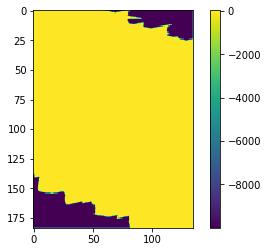

In [13]:
import pygeoprocessing
pygeoprocessing.warp_raster('../data/USCOSB20170216_SUPERsnow_depth_50p0m_agg.tif',
                            (50,-50),'../data/lat_long_SUPERsnow_depth_50p0m_agg.tif',
                            'nearest',
                           target_sr_wkt=wgs84_wkt)
                           
                           
from matplotlib import pyplot
%matplotlib inline
pyplot.imshow(gdal.Open('../data/USCOSB20170216_SUPERsnow_depth_50p0m_agg.tif').ReadAsArray())
pyplot.colorbar()

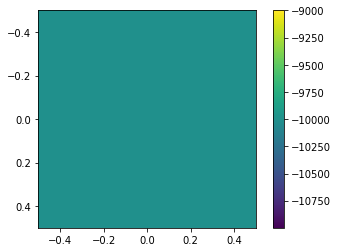

In [20]:
from matplotlib import pyplot
%matplotlib inline
pyplot.imshow(gdal.Open('../data/lat_long_SUPERsnow_depth_50p0m_agg.tif').ReadAsArray())
pyplot.colorbar()